### Import all necessary libraries for analysis

In [223]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Reading the data into pandas dataframe

In [224]:
mental_health = pd.read_csv('survey.csv')
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Checking the Unique values in the Gender column

In [225]:
mental_health["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

### Cleaning up the Gender column
Evidently, we can see that there are many different values in the Gender column. Most of the issues are caused by typos and some of it is due to gender identification.
The next step will be cleaning up the gender column by stripping all leading or trailing spaces and **CAPITALIZE** the values for initial classification.

In [226]:
mental_health["Gender"] = (mental_health["Gender"]
						   .str.capitalize()
						   .str.strip())
mental_health["Gender"].sort_values().value_counts()

Gender
Male                                              824
Female                                            185
M                                                 150
F                                                  53
Make                                                4
Woman                                               4
Cis male                                            3
Female (trans)                                      2
Man                                                 2
Enby                                                1
Cis-female/femme                                    1
Cis man                                             1
Cis female                                          1
All                                                 1
Androgyne                                           1
Agender                                             1
A little about you                                  1
Genderqueer                                         1
Fluid                

After cleaning up the values inside the gender column, the next step is to clean up the different gender identification. For the next step, we are classifying it to Male, Female ad Third Gender, associating it to the response collected.

In [227]:
sorted_gender = (mental_health["Gender"]
		.str.replace(r"^(?!.*trans|fluid)F.*", "Female", regex=True)  # F but not if contains 'trans' or 'fluid'
    	.str.replace(r"^(?!.*trans|fluid)M.*", "Male", regex=True)    # same idea for Male 
		.str.replace("Woman", "Female", regex = False)				  # Replace "Woman" with "Female"
		.str.replace("Cis(-| )fem.*", "Female", regex=True)			  # Replace "Cis Female" with Female
		.str.replace("Cis ma.*", "Male", regex=True)			 	  # Replace "Cis Male" with Male
		)
sorted_gender = sorted_gender.where(
    sorted_gender.isin(["Male", "Female"]),
    "Third gender"
)
sorted_gender.sort_values().value_counts()

Gender
Male            992
Female          248
Third gender     19
Name: count, dtype: int64

Reassigning it to the Gender column in the dataframe

In [228]:
mental_health["Gender"] = sorted_gender
mental_health

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Cleaning up age column
In this data analysis, we will be removing age that is larger than 100 and below 18 years old. It is done so by assuming people older than 100 years old do not work anymore and it is inappropriate for people under 18 years old to work.

In [229]:
mental_health = mental_health[(mental_health["Age"] >= 18) & (mental_health["Age"] <= 100)]

## Question 1:
## What is the percentage of employees in the technology sector experiencing work interference due to mental health, and how does this differ by gender, age, or country?
### Plotting Charts for employees experiencing work interference with mental health condition
Pie chart is selected to visualize the breakdown percentage for each reported work interference

Text(0.5, 1.0, 'Work Interference for Tech Company Employees')

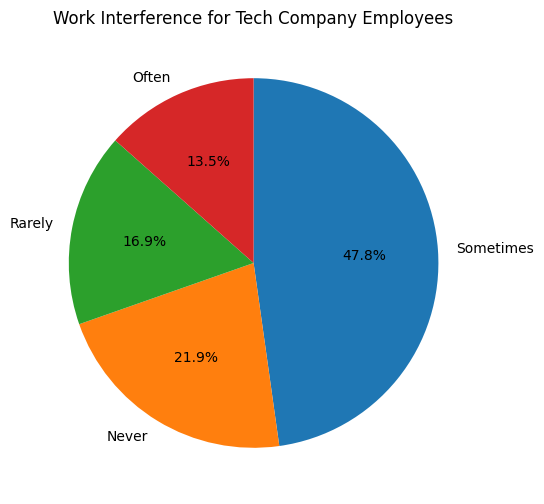

In [230]:
works_in_tech = mental_health[mental_health["tech_company"] == "Yes"] # Filter only those working in tech company
work_interference = works_in_tech["work_interfere"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
	work_interference,
	labels=work_interference.index,
	autopct="%1.1f%%",
	startangle=90,
	counterclock=False
)
plt.title("Work Interference for Tech Company Employees")

### Plotting work interference by gender
This is to find out the gender breakdown with employees who experienced wotk interference due to mental health condition.The chart plotted only take into account where employees work in technology industry.

Text(0.5, 0.02, "Remark: This pie chart does not include those who answered 'Never'")

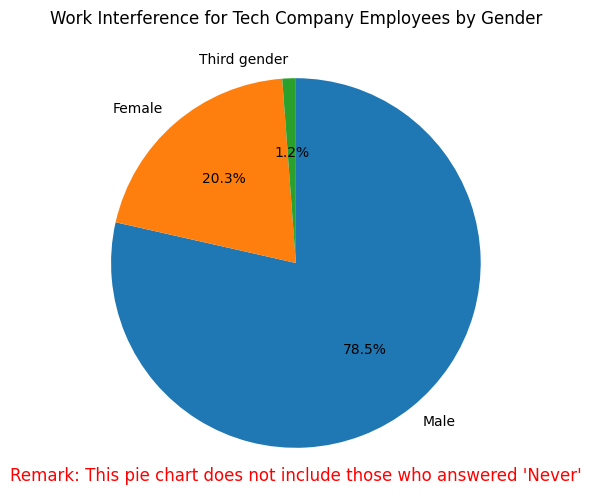

In [231]:
work_interfered = works_in_tech[works_in_tech["work_interfere"] != "Never"] # Filter out those who answered "Never"
plt.figure(figsize=(6,6))
plt.pie(
	work_interfered["Gender"].value_counts(), # Plotting chart base on the gender breakdown
	labels=work_interfered["Gender"].value_counts().index,
	autopct="%1.1f%%",
	startangle=90,
	counterclock=False
)
plt.title("Work Interference for Tech Company Employees by Gender")
plt.text(0.5, 0.02, "Remark: This pie chart does not include those who answered 'Never'", fontsize=12, color="red", ha="center", va="bottom", transform=plt.gca().transAxes)

### Visualizing the age distribution of employees facing work interference
The chart is plotted to find out the age distribution of employees facing work interference.

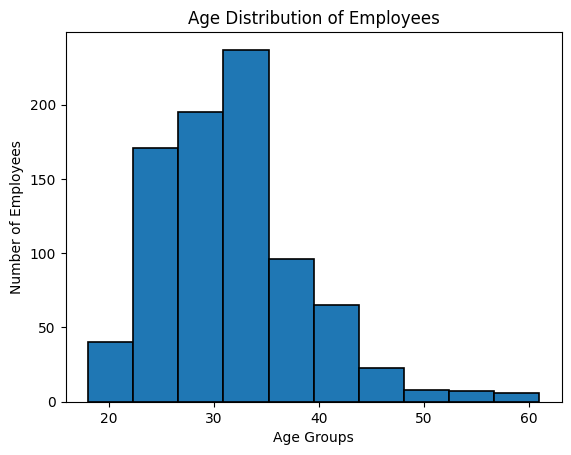

In [232]:
plt.hist(work_interfered["Age"].dropna(), bins=10, edgecolor='black', linewidth=1.2)
plt.xlabel("Age Groups")
plt.ylabel("Number of Employees")
plt.title("Age Distribution of Employees")
plt.show()

### Plotting chart to visualize the number of tech workers in each country

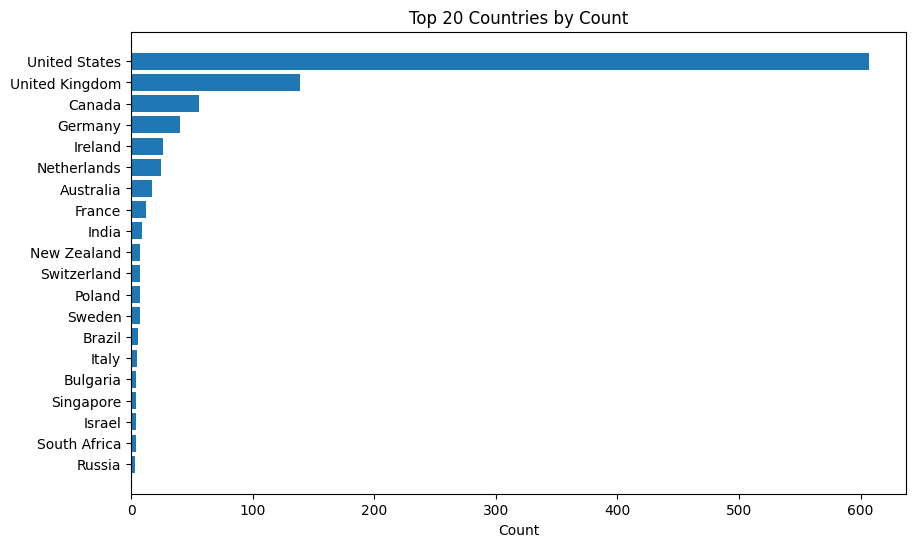

In [233]:
top_countries = works_in_tech["Country"].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values)
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Count")
plt.title("Top 20 Countries by Count")
plt.show()

### Plotting chart that shows the breakdown of health benefit offered by employer of each country

Text(0.5, 1.0, 'Employee Mental Health Benefits by Country')

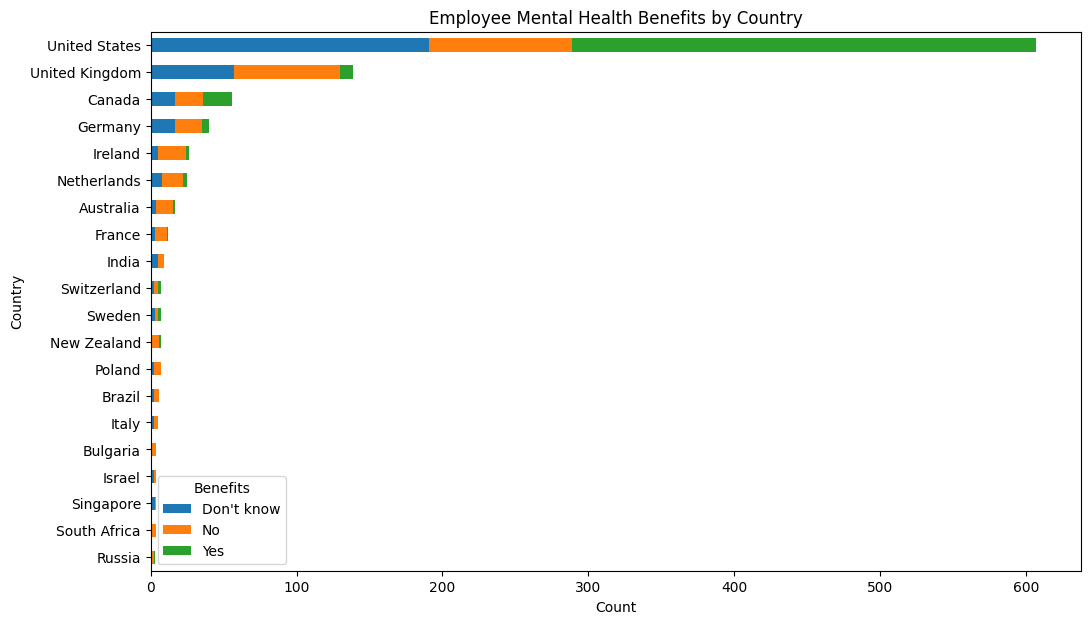

In [234]:
top_countries_list = works_in_tech[works_in_tech["Country"].isin(top_countries.index)]
by_country = top_countries_list.groupby("Country")["benefits"].value_counts().unstack()
by_country.fillna(0, inplace=True)
by_country['sum'] = by_country.sum(axis=1)
by_country = by_country.sort_values('sum', ascending=False).drop(columns='sum')
by_country.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Benefits")
plt.title("Employee Mental Health Benefits by Country")

### Finding the breakdown of employees sought for treatment

Text(0.5, 1.0, 'Employees Who Sought Treatment by Country')

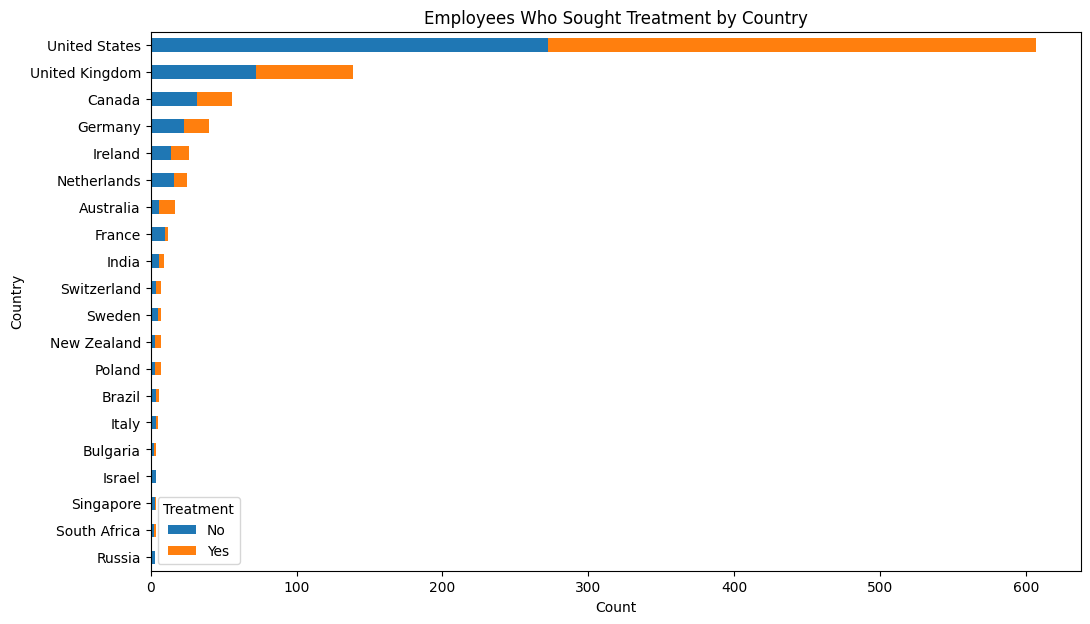

In [235]:
sought_treatment = top_countries_list.groupby("Country")["treatment"].value_counts().unstack()
sought_treatment.fillna(0, inplace=True)
sought_treatment['sum'] = sought_treatment.sum(axis=1)
sought_treatment = sought_treatment.sort_values('sum', ascending=False).drop(columns='sum')
sought_treatment.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Treatment")
plt.title("Employees Who Sought Treatment by Country")

Text(0.5, 1.0, 'Employees Who Sought Treatment by Country')

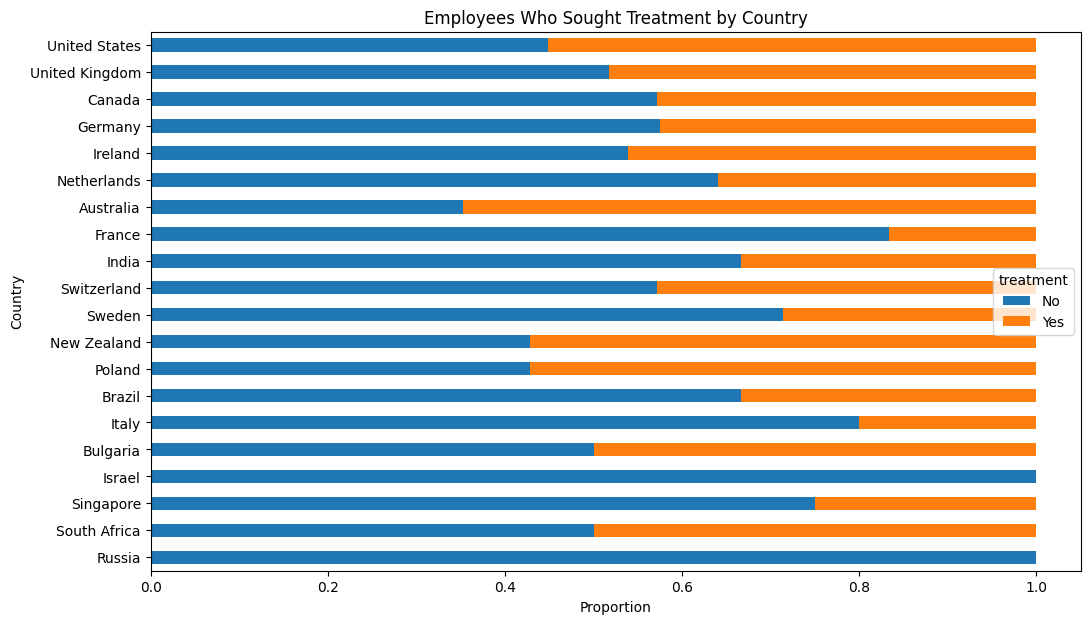

In [236]:
normalized = sought_treatment.div(sought_treatment.sum(axis=1), axis=0)
normalized.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Proportion")
plt.ylabel("Country")
plt.title("Employees Who Sought Treatment by Country")

In [237]:
works_in_tech.to_csv('works_in_tech.csv', index=False)

## Question 2:
## Can we predict if employees will seek treatment for a mental health issue with demographic factors and workplace factors?

### Importing the necessary library

In [238]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Defining features and splitting up training and testing data.
Declaring the features for machine learning and the target as the output result.
The features included are issues with workplace factors.
The target is set to be treatment as we would like to explore how does it affect the employee to seek for treatment.
The data is split at **80%** - **20%** for training and test data.

We will be using 2 different types of machine learning model for a side-by-side comparison. The model used in this analysis will be **Random Forest Classifier** and **Logistics Regression**


In [239]:
features = ['no_employees', 'remote_work', 'benefits', 'care_options', 
			'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 
			'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
			'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
target = 'treatment'

X = works_in_tech[features]
y = works_in_tech[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((820, 16), (205, 16), (820,), (205,))

### Data Preprocessing Pipelines
The data are split into categorical features and numerical features. Categorical features include string or object type data while numerical featuers include data in integer ot float type data. The preprocessing pipeline strategy is tabulate as such.

| Feature Type | Imputation Method | Encoding Method |
|--------------|-------------------|-----------------|
| Categorical  | Simple Imputer, by most frequency | One Hot Encoder |
| Numerical    | Simple Imputer, by mean | None |


In [240]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features, numerical_features
categorical_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='most_frequent')),
	('encoder', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='mean')),
	('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
	transformers=[
		('cat', categorical_transformer, categorical_features),
		('num', numerical_transformer, numerical_features)
	]
)



### Defining Model and Evaluate Accuracy
First model will be **Random Forest Classifier**. This model for the prediction as it handles categorical and numerical data fairly well. The type of model is ***ensemble model***. As a comparison, we will be using **Logistic Regression** model next, which is a ***linear model***.

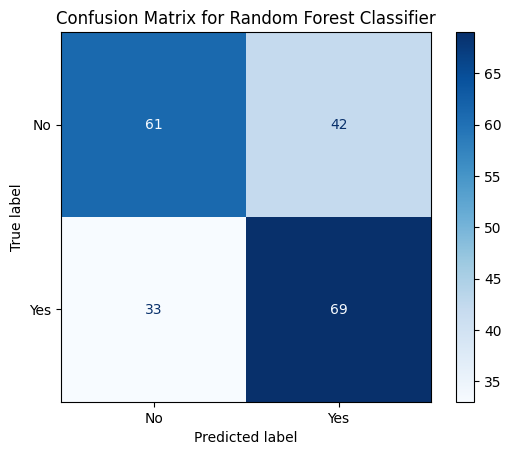

              precision    recall  f1-score   support

          No       0.65      0.59      0.62       103
         Yes       0.62      0.68      0.65       102

    accuracy                           0.63       205
   macro avg       0.64      0.63      0.63       205
weighted avg       0.64      0.63      0.63       205



In [241]:
clf = Pipeline(steps=[
	('preprocessor', preprocessor),
	('classifier', RandomForestClassifier(random_state=42))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm  = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()
print(classification_report(y_test, y_pred))

Second model is **Logistic Regression**. It is chosen as a comparison to **Random Forest Classifier** due to the difference in the model type.

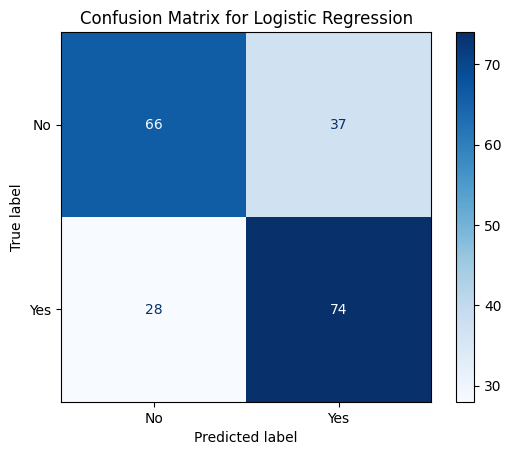

              precision    recall  f1-score   support

          No       0.70      0.64      0.67       103
         Yes       0.67      0.73      0.69       102

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205



In [242]:
clf = Pipeline(steps=[
	('preprocessor', preprocessor),
	('classifier', LogisticRegression(random_state=42))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm  = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
print(classification_report(y_test, y_pred))

## Question 3

### Checking unique value and Cleaning up benefits and treatment column

In [243]:
df = mental_health[["benefits", "treatment"]].dropna()

print(df["benefits"].unique())
print(df["treatment"].unique())

['Yes' "Don't know" 'No']
['Yes' 'No']


### Descriptive Visualization: Benefits vs Treatment

We create a **cross-tabulation** between `benefits` and `treatment`, normalized by row proportions.  
A stacked bar chart is used to visualize the proportion of employees who sought treatment, grouped by benefit status.  

This gives us an initial descriptive overview of how treatment-seeking behavior differs depending on whether benefits are available.


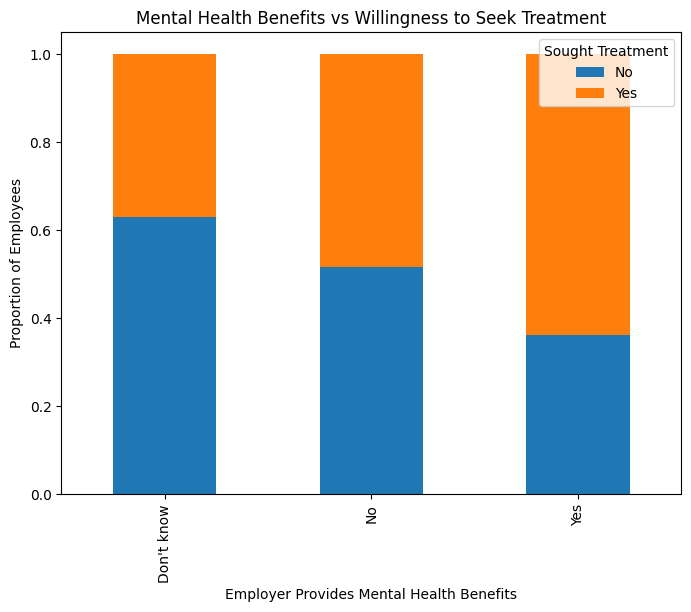

In [244]:
benefit_vs_treatment = pd.crosstab(
    df["benefits"], df["treatment"], normalize="index"
)

benefit_vs_treatment.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Mental Health Benefits vs Willingness to Seek Treatment")
plt.xlabel("Employer Provides Mental Health Benefits")
plt.ylabel("Proportion of Employees")
plt.legend(title="Sought Treatment")
plt.show()

### Statistical Test: Chi-Square Test of Independence

To test whether the observed differences are statistically significant, we use the **Chi-Square Test of Independence**.  

- **Null hypothesis (H0):** There is no relationship between mental health benefits and willingness to seek treatment.  
- **Alternative hypothesis (H1):** There is a relationship between benefits and treatment-seeking.  

If the p-value < 0.05, we reject H0 and conclude that having benefits is significantly associated with willingness to seek treatment.

In [245]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["benefits"], df["treatment"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)



Chi-square: 63.696948152795784
p-value: 1.4736130252077323e-14


### Predictive Modeling: Logistic Regression

We apply **Logistic Regression** to see if employer benefits influence treatment-seeking.  

- `treatment`: Yes=1, No=0  
- `benefits`: converted into dummy variables  

**Interpretation:**  
A positive coefficient means employees with benefits are more likely to seek treatment.


In [246]:
from sklearn.linear_model import LogisticRegression

# Encode variables
X = pd.get_dummies(df["benefits"], drop_first=True) 
y = df["treatment"].map({"Yes":1, "No":0})            

model = LogisticRegression().fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [[0.43673855 1.07038156]]
Intercept: [-0.51145087]


### Odds Ratios and Visualization

Since logistic regression coefficients are in **log-odds**, we convert them into **odds ratios** for easier interpretation.  

- Odds Ratio > 1 → Benefits increase the likelihood of seeking treatment.  
- Odds Ratio < 1 → Benefits decrease the likelihood.  
- Odds Ratio = 1 → No effect.  

We plot the odds ratios in a bar chart with a reference line at 1.  
This makes the results more intuitive and easier to communicate to non-technical stakeholders (e.g., HR teams).


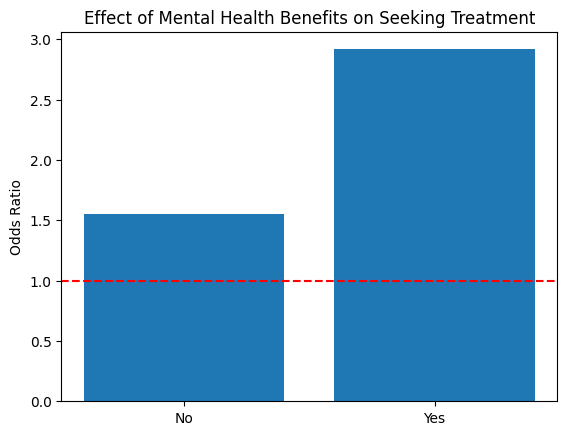

No: Odds Ratio = 1.55
Yes: Odds Ratio = 2.92


In [247]:
import numpy as np

odds_ratios = np.exp(model.coef_[0])
feature_names = X.columns

plt.bar(feature_names, odds_ratios)
plt.title("Effect of Mental Health Benefits on Seeking Treatment")
plt.ylabel("Odds Ratio")
plt.axhline(y=1, color="red", linestyle="--")
plt.show()

for feature, odds in zip(feature_names, odds_ratios):
    print(f"{feature}: Odds Ratio = {odds:.2f}")


## Question 4


### Checking unique value and Cleaning up benefits and treatment column

In [248]:
df2 = mental_health[["benefits", "coworkers"]].dropna()

print(df2["benefits"].unique())
print(df2["coworkers"].unique())


['Yes' "Don't know" 'No']
['Some of them' 'No' 'Yes']


### Descriptive Visualization: Benefits vs Coworkers

A cross-tab analysis shows how willingness to discuss mental health with coworkers varies depending on whether employers provide benefits.  

- **Proportion Chart (Stacked Bars):**  
  Shows the relative share of employees in each response category.  
  Most employees indicate they would talk to *some coworkers*, while those **without benefits** are slightly more likely to avoid discussion.  

- **Count Chart (Grouped Bars):**  
  Displays the actual number of employees in each group, providing context on sample sizes.  
  The counts confirm that employees with benefits generally report more openness compared to those without benefits.  



coworkers         No  Some of them       Yes
benefits                                    
Don't know  0.184275      0.646192  0.169533
No          0.242588      0.560647  0.196765
Yes         0.196617      0.634249  0.169133


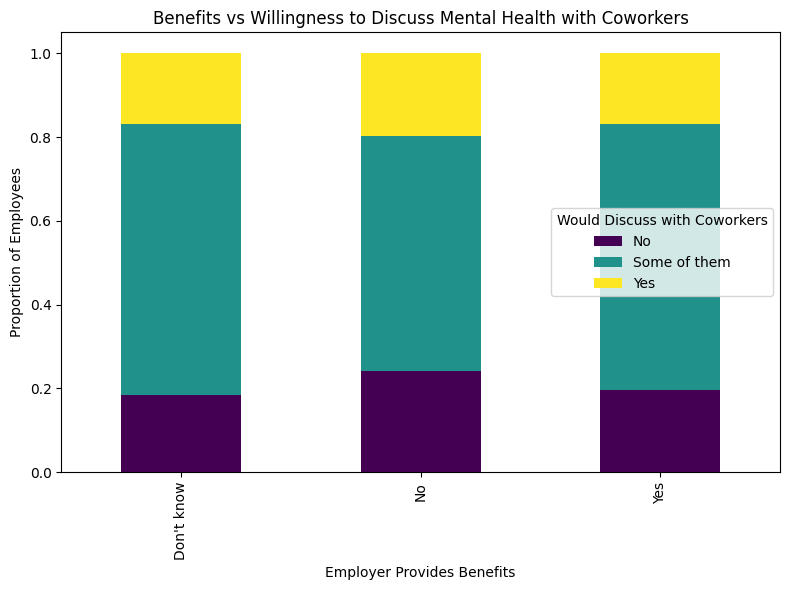

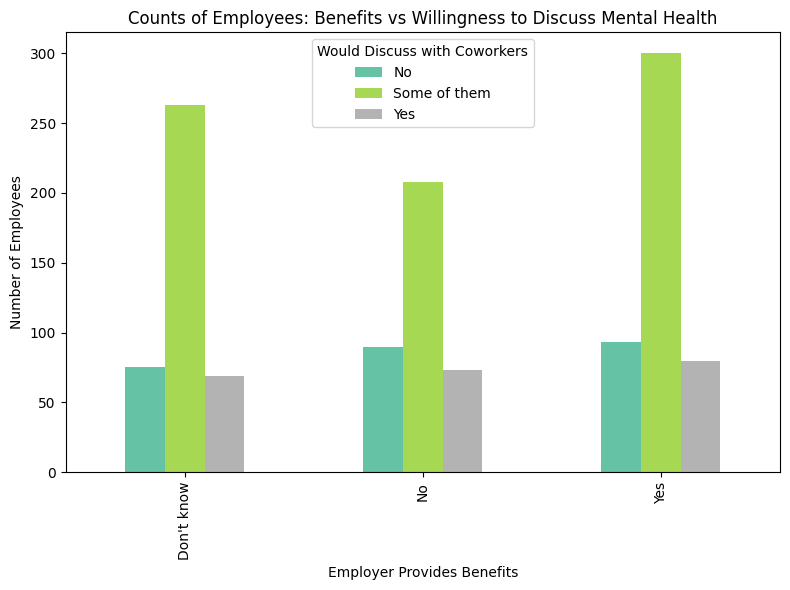

In [249]:
crosstab_norm = pd.crosstab(df2["benefits"], df2["coworkers"], normalize="index")
print(crosstab_norm)
# Crosstab with counts (for statistical test)
crosstab_counts = pd.crosstab(df2["benefits"], df2["coworkers"])


crosstab_norm.plot(kind="bar", stacked=True, figsize=(8,6), colormap="viridis")
plt.title("Benefits vs Willingness to Discuss Mental Health with Coworkers")
plt.xlabel("Employer Provides Benefits")
plt.ylabel("Proportion of Employees")
plt.legend(title="Would Discuss with Coworkers")
plt.tight_layout()
plt.show()

crosstab_counts.plot(kind="bar", figsize=(8,6), colormap="Set2")
plt.title("Counts of Employees: Benefits vs Willingness to Discuss Mental Health")
plt.xlabel("Employer Provides Benefits")
plt.ylabel("Number of Employees")
plt.legend(title="Would Discuss with Coworkers")
plt.tight_layout()
plt.show()


### Statistical Test: Chi-Square Test of Independence

To test whether the availability of employer-provided mental health benefits is **associated** with employees’ willingness to discuss mental health with coworkers, we performed a Chi-Square Test of Independence.

- **Test Statistic (χ²):** <your chi2 value here>  
- **Degrees of Freedom:** <your dof here>  
- **p-value:** <your p-value here>  

#### Interpretation
- If **p < 0.05**, we reject the null hypothesis and conclude that there is a **statistically significant relationship** between employer-provided benefits and openness to discuss mental health.  
- If **p ≥ 0.05**, we fail to reject the null hypothesis, meaning the data does **not provide evidence** of a significant relationship.   


In [250]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df2["benefits"], df2["coworkers"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship: Benefits are associated with openness about mental health at work")
else:
    print("❌ No significant relationship found")

Chi-square test statistic: 7.351019802761991
Degrees of freedom: 4
p-value: 0.11846097769699032
❌ No significant relationship found


### Residuals Visualization: Chi-Square Test

To better understand the Chi-Square results, we plotted a **residuals heatmap** comparing observed vs. expected values.  

- **Positive residuals (blue)** → More employees were observed in that cell than expected under independence.  
- **Negative residuals (red)** → Fewer employees were observed than expected.  
- **Values near 0** → The observed counts are close to what we would expect if there was no relationship.  

This visualization highlights which combinations of *benefits* and *coworker openness* contribute most to the Chi-Square statistic, helping interpret the direction of the relationship.


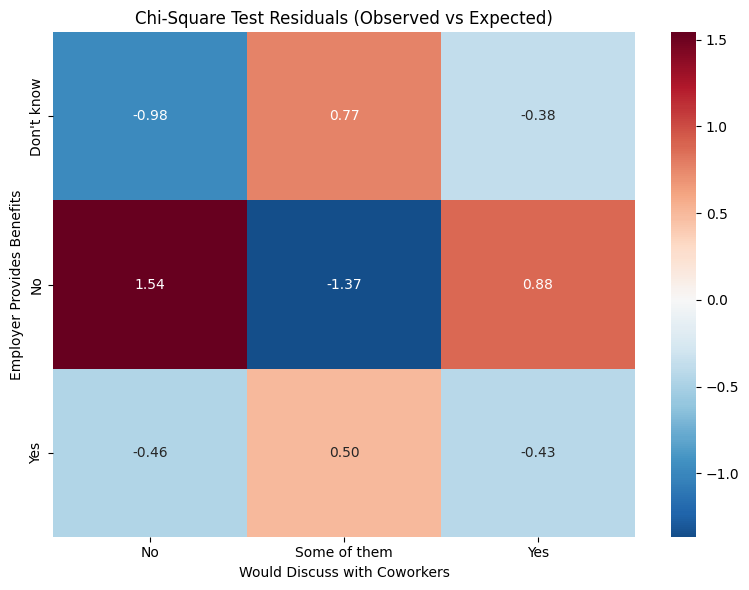

In [251]:
observed = contingency
expected_df = pd.DataFrame(expected, 
                           index=observed.index, 
                           columns=observed.columns)

residuals = (observed - expected_df) / expected_df**0.5

plt.figure(figsize=(8,6))
sns.heatmap(residuals, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Chi-Square Test Residuals (Observed vs Expected)")
plt.xlabel("Would Discuss with Coworkers")
plt.ylabel("Employer Provides Benefits")
plt.tight_layout()
plt.show()